###**Multi Layer Perceptron**###

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import copy
from google.colab import drive
drive.mount("/content/gdrive/",force_remount = True)

# Use Tic-Tac-Toe Dataset

data = pd.read_csv('/content/gdrive/MyDrive/Colab_Files/tic-tac-toe.csv')

Mounted at /content/gdrive/


###**Pre-Processing Data**###

In [ ]:
data.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,Class
0,1,1,1,1,-1,-1,1,-1,-1,1
1,1,1,1,1,-1,-1,-1,1,-1,1
2,1,1,1,1,-1,-1,-1,-1,1,1
3,1,1,1,1,-1,-1,-1,0,0,1
4,1,1,1,1,-1,-1,0,-1,0,1


In [ ]:
# Converting pandas data frame to numpy array
data = np.array(data)
m, n = data.shape
#np.random.shuffle(data) # shuffle before splitting into dev and training sets

print(data.shape)
print(data)

(958, 10)
[[ 1  1  1 ... -1 -1  1]
 [ 1  1  1 ...  1 -1  1]
 [ 1  1  1 ... -1  1  1]
 ...
 [-1  1 -1 ... -1  1 -1]
 [-1  1 -1 ... -1  1 -1]
 [-1 -1  1 ...  1  1 -1]]


###**Batch Split**###

In [ ]:
# # Training set size in percentage
# ratio = 80

# # Segrigating the classes to a different array
# classes = copy.deepcopy(data.T[data.shape[1]-1])
# classes[classes == -1] = 0

# # Removing the class from the inputs
# inputs = np.delete(data,data.shape[1]-1,1)

# # Splitting the data into test and train set
# X_train, X_test, y_train, y_test = train_test_split(data, classes, test_size=(100.0 - ratio)/100.0, random_state=42)

# #Deleting the class column from the input sets
# X_train = np.delete(X_train,X_train.shape[1]-1,1)
# X_test = np.delete(X_test,X_test.shape[1]-1,1)


In [ ]:
# Training set size in percentage
ratio = 80

# Batch Size
batch = 8

# Segrigating the classes to a different array
classes = copy.deepcopy(data.T[data.shape[1]-1])
classes[classes == -1] = 0

# Removing the class from the inputs
inputs = np.delete(data,data.shape[1]-1,1)

# Splitting the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(data, classes, test_size=(100.0 - ratio)/100.0, random_state=42)

#Deleting the class column from the input sets
X_train = np.delete(X_train,X_train.shape[1]-1,1)
X_test = np.delete(X_test,X_test.shape[1]-1,1)



# Splitting the data into mini batches
X_train_Batch = []
y_train_Batch = []
X_test_tmp = []
y_test_tmp = []
i = 0
#Breaking the training dataset into batches
# print(X_train.shape[0])
while i < X_train.shape[0]:
  if((i + 1) % (batch + 1) != 0):
    X_test_tmp.append(X_train[i])
    y_test_tmp.append(y_train[i])
  else:

    # Delete the class from the test data in batches
    X_test_tmp = np.array(X_test_tmp)
    y_test_tmp = np.array(y_test_tmp)
    # X_test_tmp = np.delete(X_test_tmp,X_test_tmp.shape[1]-1,1)

    # Push the data onto the batch
    X_train_Batch.append(copy.deepcopy(X_test_tmp))
    y_train_Batch.append(copy.deepcopy(y_test_tmp))
    #Empty the temporary spaces
    X_test_tmp = []
    y_test_tmp = []
    i += 1
    continue
  i += 1


# if(X_test_tmp.shape[0] < batch):
#   # Delete the class from the test data in batches
#   X_test_tmp = np.delete(X_test_tmp,X_test_tmp.shape[1]-1,1)
#   # Push the data onto the batch
#   X_train_Batch.append(copy.deepcopy(X_test_tmp))
#   y_train_Batch.append(copy.deepcopy(y_test_tmp))
#   #Empty the temporary spaces
#   X_test_tmp = []
#   y_test_tmp = []







###**Initialisation of weights and**###

In [ ]:
#Initialization of parameter depends on how we define Multi level perceptron on Dataset
#Dimension for the weights and Bias will depend on this
def init_weights():
  # print("Init_Weights")
  # Input_layer to hidden layer weights
  W1 = np.random.rand(20,data.shape[1]-1) - 0.5                                 # 0.5 has been subtracted to bring the weights in +0.5 to -0.5 range
  #Bias value 
  b1 = np.random.rand(20, 1) - 0.5

  # Hidden_layer_1 to Hidden_layer_2 weights 
  W2 = np.random.rand(20, 20) - 0.5
  #Bias value
  b2 = np.random.rand(20, 1) - 0.5

  # Hidden_layer_2 to Output_layer weights 
  W3 = np.random.rand(1, 20) - 0.5
  #Bias value
  b3 = np.random.rand(1, 1) - 0.5

  #print(b2)
  
  return W1, b1, W2, b2, W3, b3

###**Activation Function**###

In [ ]:
#Activation Functions
def sigmoid(z):
    return 1./(1.+np.exp(-z))


###**Derivative of Activation Function**###

In [ ]:
#Derivation of Activation Function to reverse the applied sigmoid function to calculate errors
def dSigmoid(z):
    return sigmoid(z) *(1-sigmoid (z))

###**Forward Propagation**###

In [ ]:
# The function to execute forward propagation
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X.T) + b1                                                       # Cross product of W1 with input vector + bias1
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2                                                        # Cross product of W2 with input vector + bias2
    A2 = sigmoid(Z2)
    Z3 = W3.dot(A2) + b3                                                        # Cross product of W3 with input vector + bias3
    A3 = sigmoid(Z3)
    
    return Z1, A1, Z2, A2, Z3, A3
    # Z1 = input to Hidden_Layer1
    # A1 = output of Hidden_layer1  
    # Z2 = input to Hidden_Layer_2
    # A2 = output of Hidden_layer2  
    # Z3 = input to Output_Layer
    # A3 = output of Output_layer  

###**Neuron State Function**###

In [ ]:
# the actual output of the network is found using this function
def fired_output(Y):
  Y = Y - 0.5
  output = np.heaviside(Y,0)
  return output

###**Back Propagation**###

In [ ]:
#The back propagation function
def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):

  Actual_value = fired_output(Y)

  
  dZ3 = A3 - Actual_value
  dW3 = 1 / X.shape[0] * dZ3.dot(A2.T)                                          # Changes required to weight matrix of Output_layer 
  db3 = 1 / X.shape[0] * np.sum(dZ3,1)                                          # Changes required to bias matrix of Output_layer

  dZ2 = W3.T.dot(dZ3) * dSigmoid(Z2)
  dW2 = 1 / X.shape[0] * dZ2.dot(A1.T)                                          # Changes required to weight matrix of Hidden_layer_2
  db2 = 1 / X.shape[0] * np.sum(dZ2,1)                                          # Changes required to bias matrix of Hidden_layer_2

  dZ1 = W2.T.dot(dZ2) * dSigmoid(Z1)
  dW1 = 1 / X.shape[0] * dZ1.dot(X)                                             # Changes required to weight matrix of Hidden_layer_1
  db1 = 1 / X.shape[0] * np.sum(dZ1,1)                                          # Changes required to bias matrix of Hidden_layer_1

  return dW1, db1, dW2, db2, dW3, db3

###**Function to update parameters**###

In [ ]:
#Subtracting the loss value from from respective parameters
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):

    db1 = db1.reshape((20,1))
    db2 = db2.reshape((20,1))
    db3 = db3.reshape((1,1))

    W1 = W1 - (alpha * dW1)
    b1 = b1 - (alpha * db1)    
    W2 = W2 - (alpha * dW2)  
    b2 = b2 - (alpha * db2)
    W3 = W3 - (alpha * dW3)
    b3 = b3 - (alpha * db3)

    return W1, b1, W2, b2, W3, b3

###**Function to get the descrete predictions**###

In [ ]:
# descretises the output to 0,1 to represent not fired and fired neuron respectively
def get_predictions(A2):
    X = A2 - 0.66
    return np.heaviside(X,0)

###**Function to get Accuracy**###

In [ ]:
# compares the output and gets the accuracy 
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / batch
    # return np.sum(predictions == Y) / Y.Size

###**Function to test output**###

In [ ]:
# function to test the output from test/global data
def test_output(W1, b1, W2, b2, W3, b3, X, Y):
  Z1 = W1.dot(X.T) + b1                                                       # Cross product of W1 with input vector + bias1
  A1 = sigmoid(Z1)
  Z2 = W2.dot(A1) + b2                                                        # Cross product of W2 with input vector + bias2
  A2 = sigmoid(Z2)
  Z3 = W3.dot(A2) + b3                                                        # Cross product of W3 with input vector + bias3
  A3 = sigmoid(Z3)

  predict = get_predictions(A3)

  acc = get_accuracy(predict, Y)
  return acc


###**Gradient Descent**###

In [ ]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_weights()
    epoch_vs_Eavg_1 = []
    epoch_vs_Eavg_2 = []
    epoch_vs_Eavg_3 = []
    epoch_vs_Misclassification = []
    for i in range(iterations):
        # Applying forward_propagation
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        #Taking the value from the forward_propagation and then back_propagating the error
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        # Updating the weights and biases with respect to the output from the back_propagation
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        # Runs the iterations and prints the count at every 100 iterations
        if i % 10 == 0:
            if(i % 200 == 0):
              print("Iteration: ", i)
            predictions = get_predictions(A3)
            epoch_vs_Misclassification.append(100 - get_accuracy(predictions, Y)*100)
            epoch_vs_Eavg_1.append(db1)
            epoch_vs_Eavg_2.append(db2)
            epoch_vs_Eavg_3.append(db3)
            

    print("predictions")
    print(predictions.size)
    print(predictions)
    print(Y)
    print("Misclassification in percentage : ")
    print(epoch_vs_Misclassification)
    print("Average Error found in layer 1")
    print(epoch_vs_Eavg_1)
    print("Average Error found in layer 2(Hidden layer2)")
    print(epoch_vs_Eavg_2)
    print("Average Error found in layer 3(Hidden layer1)")
    print(epoch_vs_Eavg_3)

        
    return W1, b1, W2, b2, W3, b3, epoch_vs_Misclassification, epoch_vs_Eavg_1, epoch_vs_Eavg_2, epoch_vs_Eavg_3

###**Gradient Decent Mini Batch**###

In [ ]:
# testing zip function:
# k = 0;
# for i, j in zip(X_train_Batch, y_train_Batch):
#   print("\n\n***Single batch: "+ str(k)+"\n")
#   print(i)
#   print(j)
#   k += 1

test function

In [ ]:
def gradient_descent_mini_batch_test(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_weights()
    epoch_vs_Eavg_1 = []
    epoch_vs_Eavg_2 = []
    epoch_vs_Eavg_3 = []
    epoch_vs_Misclassification = []
    for k in range(iterations):
      for i, j in zip(X, Y):
        # Applying forward_propagation
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, i)
        #Taking the value from the forward_propagation and then back_propagating the error
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, i, j)
        # Updating the weights and biases with respect to the output from the back_propagation
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        # Runs the iterations and prints the count at every 100 iterations
        if k % 10 == 0:
          if(k % 200 == 0):
            print("Iteration: ", k)
          predictions = get_predictions(A3)
          epoch_vs_Misclassification.append(100 - get_accuracy(predictions, j)*100)
          epoch_vs_Eavg_1.append(db1)
          epoch_vs_Eavg_2.append(db2)
          epoch_vs_Eavg_3.append(db3)
            

    print("predictions")
    print(predictions.size)
    print(predictions)
    print(j)
    print("Misclassification in percentage : ")
    print(epoch_vs_Misclassification)
    print("Average Error found in layer 1")
    print(epoch_vs_Eavg_1)
    print("Average Error found in layer 2(Hidden layer2)")
    print(epoch_vs_Eavg_2)
    print("Average Error found in layer 3(Hidden layer1)")
    print(epoch_vs_Eavg_3)

        
    return W1, b1, W2, b2, W3, b3, epoch_vs_Misclassification, epoch_vs_Eavg_1, epoch_vs_Eavg_2, epoch_vs_Eavg_3

Full function

In [ ]:
def gradient_descent_mini_batch(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_weights()
    epoch_vs_Eavg_1 = []
    epoch_vs_Eavg_2 = []
    epoch_vs_Eavg_3 = []
    epoch_vs_Misclassification = []
    for k in range(iterations):
      for i, j in zip(X, Y):
        # Applying forward_propagation
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, i)
        #Taking the value from the forward_propagation and then back_propagating the error
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, i, j)
        # Updating the weights and biases with respect to the output from the back_propagation
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        # Runs the iterations and prints the count at every 100 iterations
      if k % 10 == 0:
        if(k % 200 == 0):
          print("Iteration: ", k)
        predictions = get_predictions(A3)
        epoch_vs_Misclassification.append(100 - get_accuracy(predictions, Y)*100)
        epoch_vs_Eavg_1.append(db1)
        epoch_vs_Eavg_2.append(db2)
        epoch_vs_Eavg_3.append(db3)
            

    print("predictions")
    print(predictions.size)
    print(predictions)
    print(Y)
    print("Misclassification in percentage : ")
    print(epoch_vs_Misclassification)
    print("Average Error found in layer 1")
    print(epoch_vs_Eavg_1)
    print("Average Error found in layer 2(Hidden layer2)")
    print(epoch_vs_Eavg_2)
    print("Average Error found in layer 3(Hidden layer1)")
    print(epoch_vs_Eavg_3)

        
    return W1, b1, W2, b2, W3, b3, epoch_vs_Misclassification, epoch_vs_Eavg_1, epoch_vs_Eavg_2, epoch_vs_Eavg_3

###**Calling the function**###

In [ ]:
W1, b1, W2, b2, W3, b3, epoch_vs_Misclassification, epoch_vs_Eavg_1, epoch_vs_Eavg_2, epoch_vs_Eavg_3 = gradient_descent_mini_batch_test(X_train_Batch, y_train_Batch, 0.01, 2001)

Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iteration:  0
Iterat

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[array([-0.2985675]), array([-0.42570612]), array([-0.15920634]), array([0.08828443]), array([-0.28409104]), array([-0.40831236]), array([-0.14465532]), array([0.22595315]), array([-0.02333375]), array([-0.02448009]), array([0.1010673]), array([-0.27111902]), array([-0.26492884]), array([0.10710625]), array([-0.2625058]), array([-0.13544027]), array([-0.13683265]), array([-0.0132842]), array([-0.25866192]), array([0.24347578]), array([-0.13832781]), array([-0.38504308]), array([-0.24967662]), array([0.00234545]), array([0.1353994]), array([-0.37040671]), array([0.01226432]), array([-0.36267405]), array([-0.10700699]), array([0.26954191]), array([-0.36120653]), array([0.01792645]), array([0.0168711]), array([0.02313145]), array([-0.10634296]), array([0.14781291]), array([-0.10202236]), array([0.02014098]), array([0.14363241]), array([0.0155415]), array([0.01761263]), array([0.02171778]), array([-0.10775361]), array([0.0198782]), array([0.26525571]), array([0.00885177]), array([0.0125795

###**Plotting Epoch vs. Misclassificaiton graph**###

[87.5, 100.0, 75.0, 50.0, 87.5, 100.0, 75.0, 37.5, 62.5, 62.5, 50.0, 87.5, 87.5, 50.0, 87.5, 75.0, 75.0, 62.5, 87.5, 37.5, 75.0, 100.0, 87.5, 62.5, 50.0, 100.0, 62.5, 100.0, 75.0, 37.5, 100.0, 50.0, 62.5, 50.0, 62.5, 62.5, 75.0, 62.5, 50.0, 62.5, 62.5, 62.5, 75.0, 62.5, 37.5, 62.5, 62.5, 50.0, 37.5, 50.0, 62.5, 50.0, 62.5, 50.0, 50.0, 75.0, 75.0, 37.5, 25.0, 62.5, 37.5, 37.5, 75.0, 25.0, 87.5, 25.0, 62.5, 37.5, 37.5, 75.0, 75.0, 75.0, 87.5, 50.0, 75.0, 62.5, 62.5, 87.5, 62.5, 62.5, 62.5, 75.0, 62.5, 75.0, 75.0, 87.5, 100.0, 75.0, 50.0, 100.0, 100.0, 50.0, 25.0, 25.0, 50.0, 37.5, 62.5, 50.0, 12.5, 25.0, 50.0, 25.0, 50.0, 37.5, 25.0, 25.0, 50.0, 37.5, 25.0, 50.0, 25.0, 25.0, 12.5, 12.5, 37.5, 12.5, 37.5, 37.5, 37.5, 25.0, 50.0, 25.0, 37.5, 50.0, 25.0, 50.0, 25.0, 37.5, 12.5, 12.5, 12.5, 62.5, 12.5, 37.5, 50.0, 37.5, 50.0, 37.5, 25.0, 50.0, 75.0, 62.5, 12.5, 12.5, 62.5, 37.5, 37.5, 75.0, 25.0, 87.5, 25.0, 62.5, 37.5, 37.5, 75.0, 75.0, 75.0, 87.5, 50.0, 75.0, 62.5, 62.5, 87.5, 62.5, 62.5, 

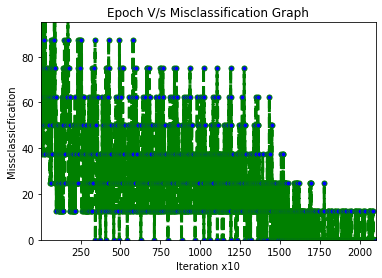

In [ ]:
print(epoch_vs_Misclassification)
#y = np.arange(100)
y = np.arange(np.array(epoch_vs_Misclassification).shape[0])

plt.plot(y,epoch_vs_Misclassification,  color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=5)
 
# setting x and y axis range
plt.xlim(1,2100)
plt.ylim(0,95)
 
# naming the x axis
plt.xlabel('Iteration x10')
# naming the y axis
plt.ylabel('Missclassicfication')
 
# giving a title to my graph
plt.title('Epoch V/s Misclassification Graph')
 
# function to show the plot
plt.show()


###**Plotting Epoch vs Average Error graph**###

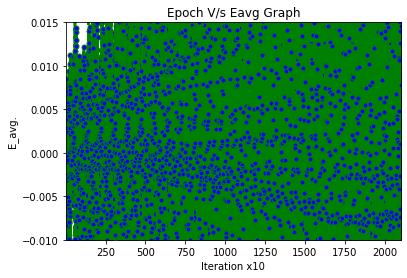

In [ ]:
y = np.arange(np.array(epoch_vs_Eavg_1).shape[0])

plt.plot(y,epoch_vs_Eavg_1,  color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=5)
 
# plt.plot(y,epoch_vs_Eavg_2,  color='black', linestyle='dashed', linewidth = 3,
#          marker='*', markerfacecolor='red', markersize=5)

plt.plot(color="tab:orange", lw=0.010, label="a line")

# plt.annotate('figure pixels',xy=(10, 10), xycoords='figure pixels')
# setting x and y axis range
plt.xlim(1,2100)
plt.ylim(-0.01,0.015)
 
# naming the x axis
plt.xlabel('Iteration x10')
# naming the y axis
plt.ylabel('E_avg.')
 
# giving a title to my graph
plt.title('Epoch V/s Eavg Graph')
 
# function to show the plot
plt.show()


###**Testing the model on Test Set**###

In [ ]:
print("Accuracy on test set:\n")
print(str(test_output(W1, b1, W2, b2, W3, b3, X_test, y_test)*100)+"%")

Accuracy on test set:

2337.5%
